<a href="https://colab.research.google.com/github/thethanh02/sentimentAnalysis/blob/main/ggcolab_text_classificatiom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/akissimas/Chatbot/main/datasets/emotions/test.csv
!wget https://raw.githubusercontent.com/akissimas/Chatbot/main/datasets/emotions/train.csv\
!wget https://raw.githubusercontent.com/akissimas/Chatbot/main/datasets/emotions/val.csv

--2023-04-22 17:16:35--  https://raw.githubusercontent.com/akissimas/Chatbot/main/datasets/emotions/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206773 (202K) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>] 201.93K  --.-KB/s    in 0.003s  

2023-04-22 17:16:35 (56.6 MB/s) - ‘test.csv.1’ saved [206773/206773]

--2023-04-22 17:16:36--  https://raw.githubusercontent.com/akissimas/Chatbot/main/datasets/emotions/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658629 (1.6M) [te

In [ ]:
!wget https://github.com/Jcharis/end2end-nlp-project/raw/main/notebooks/data/emotion_dataset_raw.csv

--2023-04-22 08:09:31--  https://github.com/Jcharis/end2end-nlp-project/raw/main/notebooks/data/emotion_dataset_raw.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jcharis/end2end-nlp-project/main/notebooks/data/emotion_dataset_raw.csv [following]
--2023-04-22 08:09:31--  https://raw.githubusercontent.com/Jcharis/end2end-nlp-project/main/notebooks/data/emotion_dataset_raw.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3291882 (3.1M) [text/plain]
Saving to: ‘emotion_dataset_raw.csv’

emotion_dataset_raw 100%[===================>]   3.14M  --.-KB/s    in 0.07s   

2023-04-22 08:09:32 (46.

In [ ]:
# download ktrain
!pip install ktrain

#import ktrain and the ktrain.text modules
import ktrain
from ktrain import text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# read the dataset
import pandas as pd
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")
valid_dataset = pd.read_csv("val.csv")

list_dataset = [train_dataset, test_dataset, valid_dataset]

dataset = pd.concat(list_dataset)

# train_dataset = pd.read_csv("emotion_dataset_raw.csv")

# list_dataset = [train_dataset]

# dataset = pd.concat(list_dataset)

Xfeatures = dataset['Text']
ylabels = dataset['Emotion']

#  Split Data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.1, random_state=41)

# convert pandas series to list
x_train = x_train.tolist()
x_test = x_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
# Create a Transformer instance
MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 256 # maximum sequence length. The longest sequence in our training set is 47.
class_names = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
# class_names = ['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']
t = text.Transformer(MODEL_NAME, MAX_LEN, class_names=class_names)

In [ ]:
# Preprocess the Datasets
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 19
	95percentile : 41
	99percentile : 52


/usr/local/lib/python3.9/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 19
	95percentile : 41
	99percentile : 53


In [ ]:
# Create a Model and Wrap in Learner
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=12)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
1500/1500 [==============================] - 507s 323ms/step - loss: 1.2158 - accuracy: 0.5448
Epoch 2/2
1500/1500 [==============================] - 408s 270ms/step - loss: 16605.5234 - accuracy: 0.3133


done.
Visually inspect loss plot and select learning rate associated with falling loss


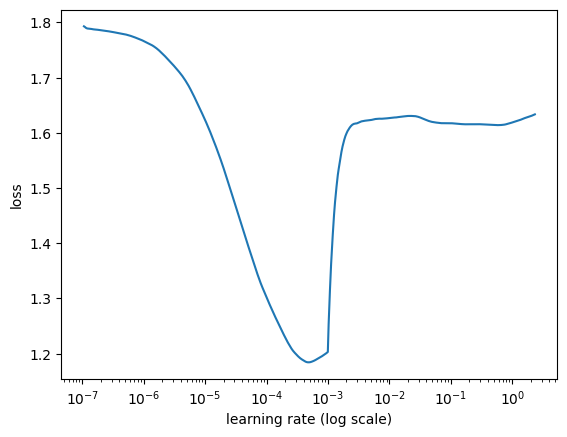

In [ ]:
# Estimate a Good Learning Rate
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
# Train Model
learner.fit_onecycle(5e-5, 6)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/6
1500/1500 [==============================] - 508s 330ms/step - loss: 0.4500 - accuracy: 0.8442 - val_loss: 0.1959 - val_accuracy: 0.9220
Epoch 2/6
1500/1500 [==============================] - 491s 328ms/step - loss: 0.1530 - accuracy: 0.9351 - val_loss: 0.2257 - val_accuracy: 0.9185
Epoch 3/6
1500/1500 [==============================] - 491s 327ms/step - loss: 0.1412 - accuracy: 0.9392 - val_loss: 0.1428 - val_accuracy: 0.9325
Epoch 4/6
1500/1500 [==============================] - 492s 328ms/step - loss: 0.1056 - accuracy: 0.9497 - val_loss: 0.1510 - val_accuracy: 0.9300
Epoch 5/6
1500/1500 [==============================] - 496s 331ms/step - loss: 0.0742 - accuracy: 0.9649 - val_loss: 0.1549 - val_accuracy: 0.9285
Epoch 6/6
1500/1500 [==============================] - 492s 328ms/step - loss: 0.0478 - accuracy: 0.9782 - val_loss: 0.1916 - val_accuracy: 0.9270


In [ ]:
# Evaluate/Inspect Model
learner.validate(class_names = class_names)

63/63 [==============================] - 8s 97ms/step
              precision    recall  f1-score   support

       anger       0.94      0.93      0.93       298
        fear       0.91      0.92      0.91       225
         joy       0.95      0.93      0.94       666
        love       0.79      0.83      0.81       161
     sadness       0.96      0.97      0.96       581
    surprise       0.82      0.77      0.79        69

    accuracy                           0.93      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.93      0.93      0.93      2000



array([[278,   6,   1,   0,  12,   1],
       [  3, 207,   0,   0,   8,   7],
       [  3,   2, 621,  36,   2,   2],
       [  1,   0,  26, 133,   0,   1],
       [ 12,   3,   3,   0, 562,   1],
       [  0,  10,   5,   0,   1,  53]])

In [ ]:
# the one we got most wrong
learner.view_top_losses(n=1, preproc=t)

63/63 [==============================] - 5s 82ms/step
----------
id:306 | loss:10.38 | true:sadness | pred:joy)



In [ ]:
# Make Predictions on New Data
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.predict("I can't imagine how hard it must be for you.")

'anger'

# Save Model

In [ ]:
# save Predictor (i.e., model and Preprocessor instance) after partially training
predictor.save("/saved_model")

# Load Model

In [ ]:
# reload Predictor and extract model
#model = ktrain.load_predictor('/content/saved_model')